<a href="https://colab.research.google.com/github/annisapraditha/tugaspraktikum_ML3/blob/main/(versi_3)_Kegiatan_Modul_3(Punya_ditha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #1**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang telah dibangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### Pengenalan tugas kegiatan 1

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

### 1. Initial process



* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

* Untuk selanjutnya pahami code dibawah dengan baik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS/

/content/drive/My Drive/RESEARCH CENTER/DATASETS


In [ ]:
# Cek apakah api sudah terbaca oleh sistem
from google.colab import files
!ls  
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annisapraditha8","key":"c73b0a51334914c163d2ce52d2743747"}'}

* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google dari kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 97% 296M/306M [00:03<00:00, 99.5MB/s]
100% 306M/306M [00:03<00:00, 97.7MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rockpaperscissors.zip


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


Buat folder baru bernama `dataset` dan memindahkan folder `paper, rock, scissors` kedalam folder `dataset`. Selanjutnya, lakukan splitting dataset menjadi 3 bagian `train, test, val` dan simpan ketiga folder tersebut diluar folder `dataset`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
# TULIS CODE ANDA DISINI
%cd /content/drive/My Drive/RESEARCH CENTER
!ls

/content/drive/My Drive/RESEARCH CENTER
DATASETS


### 2. Data Preprocessing

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit proses augmentasi sederhana. 

**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

Lakukan proses agumentasi sederhana pada dataset anda menggunakan `ImageDataGenerator` dengan ketentuan melakukan proses seperti berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.

In [ ]:
# TULIS CODE ANDA DISINI
os.mkdir("DATASETS/train")
os.mkdir("DATASETS/train/rock")
os.mkdir("DATASETS/train/paper")
os.mkdir("DATASETS/train/scissors")
os.mkdir("DATASETS/test")
os.mkdir("DATASETS/test/rock")
os.mkdir("DATASETS/test/paper")
os.mkdir("DATASETS/test/scissors")
os.mkdir("DATASETS/validation")
os.mkdir("DATASETS/validation/rock")
os.mkdir("DATASETS/validation/paper")
os.mkdir("DATASETS/validation/scissors")

In [ ]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/validation/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [ ]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS/train"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/test/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [ ]:
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS

/content/drive/My Drive/RESEARCH CENTER/DATASETS


In [ ]:
!ls

kaggle.json  README_rpc-cv-images.txt  rps-cv-images  test   validation
paper	     rock		       scissors       train


In [ ]:
import os

train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')

#penamaan variabel data rok paper dll 

In [ ]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

print('\ntotal validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

print('\ntotal test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissors images:', len(os.listdir(test_scissors_dir)))

total training rock images: 464
total training paper images: 455
total training scissors images: 480

total validation rock images: 146
total validation paper images: 143
total validation scissors images: 150

total test rock images: 116
total test paper images: 114
total test scissors images: 120


In [ ]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = "train"
test_path  = "test"
val_path   = "validation"

In [ ]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(  train_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = True)

Found 1399 images belonging to 3 classes.


In [ ]:
validation_set = val_datagen.flow_from_directory(    val_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 439 images belonging to 3 classes.


In [ ]:
test_set = val_datagen.flow_from_directory(         test_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 350 images belonging to 3 classes.


### 3. Definisikan Model CNN

Bangun model CNN dan lakukan evaluasi sesuai kriteria **WAJIB** berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix
* Pastikan nilai akurasi model > 80%
* Mendefinisikan minimal 100 epoch untuk masing-masing model
* Melakukan prediksi minimal 15 gambar acak yang dapat mewakili seluruh kelas
* Menampilkan input gambar yang di prediksi beserta label hasil prediksi, nilai akurasi prediksi, dan lama waktu prediksi dalam sebuah plot. (15 gambar ditampilkan dalam 1 plot)
* Save model dalam file `json` dan simpan bobot dalam file `HDF5`
* Pastikan model anda dapat memprediksi unseen data dengan benar.

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[128,128,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [ ]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# TULIS CODE UNTUK TRAINING DISINI
import time

start = time.time()
H = model.fit_generator(
        training_set,
        steps_per_epoch=44,
        epochs=100,
        validation_data=validation_set,
        validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
44/44 [==============================] - 44s 298ms/step - loss: 0.7260 - acc: 0.5897 - val_loss: 12.3504 - val_acc: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 13s 288ms/step - loss: 0.5990 - acc: 0.6519 - val_loss: 17.5540 - val_acc: 0.0000e+00
Epoch 3/100
44/44 [==============================] - 13s 285ms/step - loss: 0.5267 - acc: 0.7277 - val_loss: 24.6771 - val_acc: 0.0000e+00
Epoch 4/100
44/44 [==============================] - 13s 287ms/step - loss: 0.4218 - acc: 0.8485 - val_loss: 16.5134 - val_acc: 0.0188
Epoch 5/100
44/44 [==============================] - 13s 287ms/step - loss: 0.3872 - acc: 0.8663 - val_loss: 8.6102 - val_acc: 0.0750
Epoch 6/100
44/44 [==============================] - 13s 289ms/step - loss: 0.3692 - acc: 0.8806 - val_loss: 7.7185 - val_acc: 0.0750
Epoch 7/100
44/44 [==============================] - 13s 281ms/step - loss: 0.2692 - acc: 0.9092 - val_loss: 29.4068 - val_acc: 0.0000e+00
Epoch 8/100
44/44 [======================

In [ ]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
print("waktu = ", time.time() - start, "detik")

waktu =  1269.9011499881744 detik


In [ ]:
from keras.models import save_model
model = save_model(model,'modul3.h5')

In [ ]:
!ls

kaggle.json  paper		       rock	      scissors	train
modul3.h5    README_rpc-cv-images.txt  rps-cv-images  test	validation


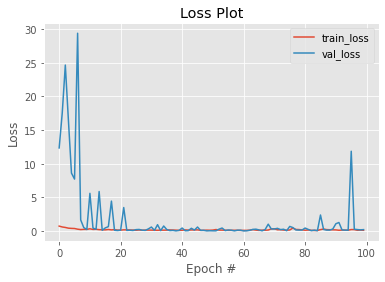

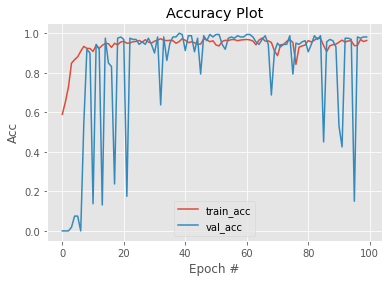

In [ ]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

test/rock/dZ6rscIYTbmlwVZE.png
Predicted: rock
 
test/rock/dnss2tOuxRmL0ZjZ.png
Predicted: rock
 
test/rock/dwcRLIlsRlaRevNn.png
Predicted: rock
 
test/rock/dxfucopsE3UFuH28.png
Predicted: rock
 
test/rock/e6cXS0w2KOKKEYZU.png
Predicted: scissors
 
test/rock/eGm3dLnWBxRrjlJX.png
Predicted: rock
 
test/rock/eHSa1nP8bmRToqyG.png
Predicted: scissors
 
test/rock/eJ5fbY23rZWUULxO.png
Predicted: rock
 
test/rock/eTo9zgxdhJJAvrfM.png
Predicted: rock
 
test/rock/eb93o1ZDeBlrdfyc.png
Predicted: rock
 
test/rock/esqqaIq6wKOr8EK6.png
Predicted: rock
 
test/rock/evxvBwQgL8Kvv67C.png
Predicted: rock
 
test/rock/f1yI657Ka9iHuVGB.png
Predicted: rock
 
test/rock/f2pYnAURozqBDJDy.png
Predicted: rock
 
test/rock/f48wzqwquNrvjICP.png
Predicted: rock
 
test/rock/fGaDsQT8mUTaytaT.png
Predicted: rock
 
test/rock/fK7m8vZQS1RUHcMr.png
Predicted: rock
 
test/rock/fLFzQoErbCBRR6NM.png
Predicted: scissors
 
test/rock/fMQzh7RRM5fbtBiC.png
Predicted: rock
 
test/rock/fQPCA8oYZ8ywDgyv.png
Predicted: rock
 
test/roc

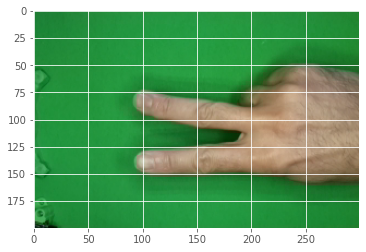

In [ ]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

model_path = 'modul3.h5'
model_weights_path = 'weight.h5'
test_path = 'test'

model = load_model(model_path)

def predict(file):
  x = load_img(file, target_size=(128,128))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 1:
    print("Predicted: rock")
  elif answer == 0:
    print("Predicted: paper")
  elif answer == 2:
    print("Predicted: scissors")

  return answer

#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    img = mpimg.imread(ret[0] + '/' + filename)
    plt.imshow(img)
    result = predict(ret[0] + '/' + filename)
    print(" ")

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd skin-lesions/

In [ ]:
ls

In [ ]:
train_dir = "train"
test_dir = "test"
valid_dir = "valid"

In [ ]:
!pip install split-folders

import splitfolders

splitfolders.ratio("Dataset", output="Newest Dataset 75:14:1", seed=1337, 
ratio=(.75, .14, .1), group_prefix=None)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

IMAGE_PATH = 'robert-woeger-9t8zwUBy8Uw-unsplash-1.jpg'
OUTPUT_DIRECTORY = '/Users/macprolucas/article_DA/output'
image = load_img(IMAGE_PATH)
image = img_to_array(image)
image = np.expand_dims(image, axis=0) 

datagen = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
PREFIX = 'Shifted'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                    save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()